In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pancancer_evaluation.config as cfg
import pancancer_evaluation.utilities.analysis_utilities as au

In [2]:
results_dir = os.path.join(
    cfg.repo_root, '03_cross_cancer_classification', 'results'
)
p53_results_dir = os.path.join(
    results_dir, 'p53_stability_pilot', 'cross_cancer'
)

In [3]:
cross_cancer_df = au.load_prediction_results_cc(p53_results_dir, 'cross_cancer')
print(cross_cancer_df.shape)
cross_cancer_df.head()

(3840, 8)


,auroc,aupr,train_identifier,test_identifier,signal,seed,data_type,experiment
0,0.97497,0.97336,TP53_LGG,TP53_LGG,signal,10,train,cross_cancer
1,0.97497,0.97336,TP53_LGG,TP53_LGG,signal,10,test,cross_cancer
2,0.96688,0.96759,TP53_LGG,TP53_LGG,signal,10,cv,cross_cancer
0,1.00000,1.00000,TP53_SARC,TP53_SARC,signal,3,train,cross_cancer
1,1.00000,1.00000,TP53_SARC,TP53_SARC,signal,3,test,cross_cancer


In [8]:
heatmap_df, sorted_ids = au.heatmap_from_results(cross_cancer_df,
                                                 normalize_control=True,
                                                 sort_results=False)
heatmap_df.iloc[:5, :5]

test_identifier,TP53_BLCA,TP53_BRCA,TP53_COAD,TP53_LGG,TP53_LUAD
train_identifier,,,,,
TP53_BLCA,0.468778,0.433715,0.274924,0.092554,0.300342
TP53_BRCA,0.260828,0.587076,0.218038,0.222713,0.285390
TP53_COAD,0.228648,0.249131,0.345130,0.096214,0.280085
TP53_LGG,0.185695,0.260923,0.129134,0.478854,0.199958
TP53_LUAD,0.287071,0.472707,0.252163,0.253624,0.487172


Text(115.0, 0.5, 'Train identifier')

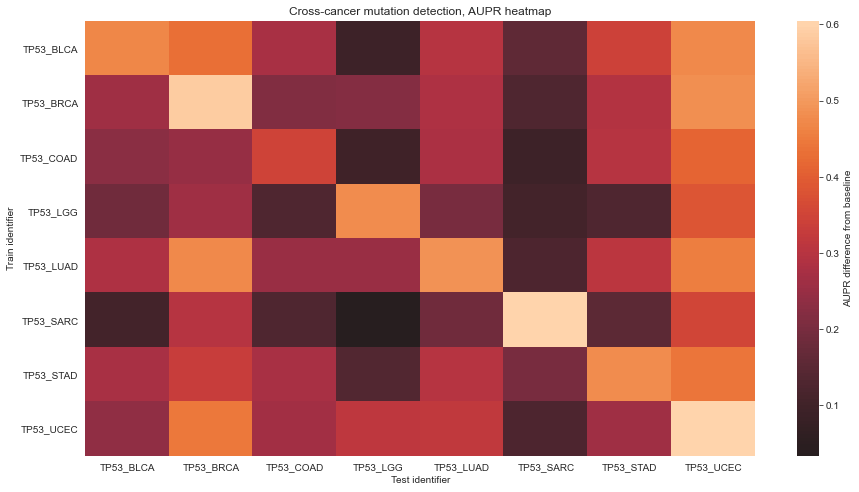

In [9]:
sns.set({'figure.figsize': (15, 8)})
sns.heatmap(heatmap_df, cbar_kws={'label': 'AUPR difference from baseline'}, center=0)
plt.title('Cross-cancer mutation detection, AUPR heatmap')
plt.xlabel('Test identifier')
plt.ylabel('Train identifier')